In [1]:
!pip install pillow numpy matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Exercise 1 – Segment vessels using intensity thresholding

**1.1**

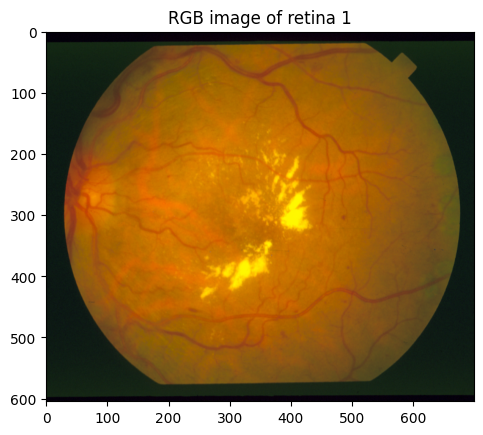

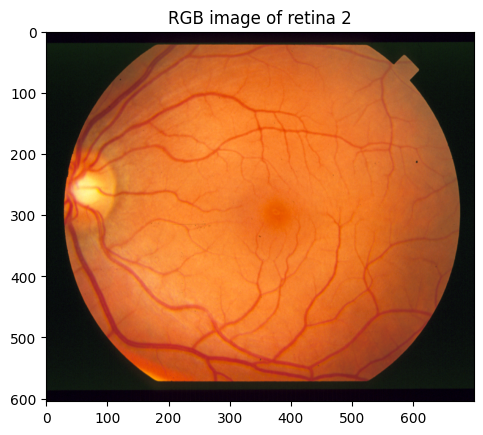

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the first RGB image
im1 = np.array(Image.open('im0001.ppm'))

# Display the image
plt.imshow(im1)
plt.title('RGB image of retina 1')
plt.show()

# Load the second RGB image
im2 = np.array(Image.open('im0077.ppm'))

# Display the image
plt.imshow(im2)
plt.title('RGB image of retina 2')
plt.show()

**Histogram**

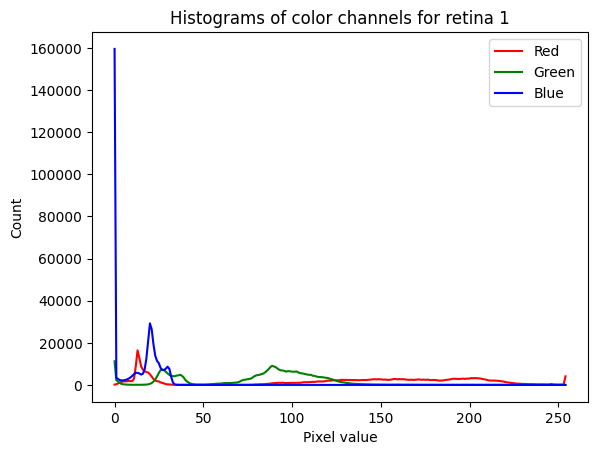

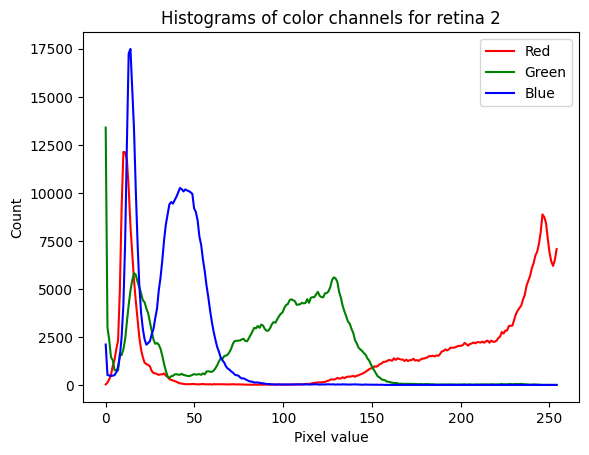

In [2]:
# Compute the histograms of the color channels for the first image
red_hist = np.histogram(im1[:,:,0], bins=256, range=(0, 255))
green_hist = np.histogram(im1[:,:,1], bins=256, range=(0, 255))
blue_hist = np.histogram(im1[:,:,2], bins=256, range=(0, 255))

# Plot the histograms
plt.plot(red_hist[1][:-1], red_hist[0], color='red', label='Red')
plt.plot(green_hist[1][:-1], green_hist[0], color='green', label='Green')
plt.plot(blue_hist[1][:-1], blue_hist[0], color='blue', label='Blue')
plt.title('Histograms of color channels for retina 1')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.legend()
plt.show()

# Compute the histograms of the color channels for the second image
red_hist = np.histogram(im2[:,:,0], bins=256, range=(0, 255))
green_hist = np.histogram(im2[:,:,1], bins=256, range=(0, 255))
blue_hist = np.histogram(im2[:,:,2], bins=256, range=(0, 255))

# Plot the histograms
plt.plot(red_hist[1][:-1], red_hist[0], color='red', label='Red')
plt.plot(green_hist[1][:-1], green_hist[0], color='green', label='Green')
plt.plot(blue_hist[1][:-1], blue_hist[0], color='blue', label='Blue')
plt.title('Histograms of color channels for retina 2')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.legend()
plt.show()


**1.2**

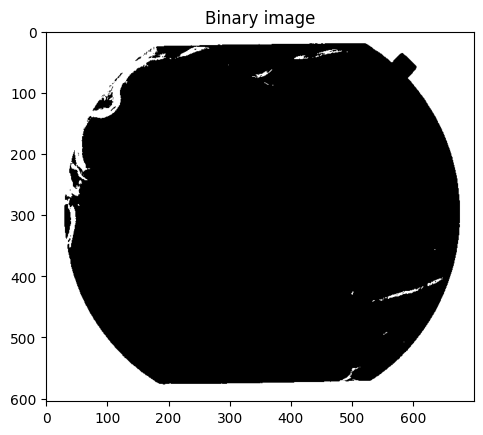

In [3]:
from skimage.filters import threshold_otsu

# Extract the green channel of the first image
green_channel = im1[:,:,1]

# Compute the Otsu threshold value
threshold_value = threshold_otsu(green_channel)

# Apply the threshold to the green channel
binary_image = green_channel < threshold_value

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary image')
plt.show()

**1.3**

In [4]:
# # Load the labeled vessels for the first image
label_im1 = np.array(Image.open('im0001_label.ppm'))


# # Compute the binary labeling
binary_label_im1 = label_im1 > 1

# # Compute the Dice and Jaccard similarity indices
intersection = np.logical_and(binary_label_im1, binary_image) 
dice = 2 * intersection.sum() / (binary_label_im1.sum() + binary_image.sum())
jaccard = intersection.sum() / (binary_label_im1.sum() + binary_image.sum() - intersection.sum())

# # Print the results
print('Dice similarity coefficient:', dice)
print('Jaccard similarity index:', jaccard)


Dice similarity coefficient: 0.06194227095491063
Jaccard similarity index: 0.03196100406432709


**1.4**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score

# Load RGB image and binary label image
im = plt.imread('im0001.ppm')
binary_label_im = plt.imread('im0001_groundtruth_binary.png')

# Define vector of possible threshold values
thresholds = np.arange(0, 256, 10)

# Compute Jaccard index for each threshold value
jaccard_indices = []
for threshold in thresholds:
    # Apply threshold to image
    binary_im = im[:,:,0] < threshold
    
    # Compute Jaccard index
    jaccard_index = jaccard_similarity_score(binary_label_im.ravel(), binary_im.ravel())
    jaccard_indices.append(jaccard_index)

# Plot results
plt.plot(thresholds, jaccard_indices)
plt.xlabel('Threshold value')
plt.ylabel('Jaccard index')
plt.title('Jaccard index vs threshold value')
plt.show()


ImportError: ignored